In [1]:
import numerical_methods as nm
import numerical_differentiation as nd
import numpy as np
import matplotlib.pyplot as plt

# Use Latex fonts for all matplotlib.pyplot plots. Set default figure size to 9x3
plt.rcParams.update({'text.usetex': True, 'font.size': 14, 'figure.figsize' : [9, 3]})

The software in this project has been split into two distinct modules. The first of which, numerical_methods.py, deals with numerical methods involved in the approximations of ODE's, including IVP's and numerical shooting and continuation. The latter, numerical_differentiation.py, focuses on PDE's, using finite differnce, explicit and implicit methods to investiage a range of PDE problems. The decision to split these into two libraries was made to provide the user with more intuation as to what the modules can achieve. Each contain their own unique documentations outlining the contained functions, as well as in-depth examples of their uses.

# Numerical_Methods.py
Numerical_methods.py contains 4 main functions; solve_to, shooting, natural_parameter and pseudo_arclength. These 4 perfom the bulk of the operations possible within this module.

Each function contains a full summary of its use within its documentation. The functions are brefily described below:

1. solve_to - solve a given ode from an initial time, to a final time, using an initial condition in a given step-size
2. shooting - root finder that solves for ODE limit cycles with a given phase condition
3. natural_parameter - investigate the affects of parameter values on ODE solutions using natural parameter continuation
4. pseudo_arclength - investigate the affects of parameter values on ODE solutions using pseudo-arclength continuation

There are 5 additional functions within this module that are used as part of these larger methods; euler_step, midpoint_method, runge_kutta and error_handle. These functions may be called independantly, however their use is intended as part of the main functions. Their uses are:

1. euler_method - calculates one step of the euler method for solving ODE's
2. midpoint_method - calculates one step of the midpoint method for solving ODE's
3. runge_kutta - calculates ones step of the runge-kutta 4th order method for solving ODE's
4. min_func - function being minimised for finding limit cycles
5. error_handle - commonly used error capturing techniques used accross several functions

Finally, an optional function for consistant graph plotting using the Matplotlib.pyplot library is included; graph_format. This is used to set the title, axis labels and an option to save the figure as a .png file (in a dedicated results folder) without repeating several lines of code.  

## Solve_to
An example using the solve_to function is shown below. The Euler method is used to solve the second order ODE $\ddot{x}(t) = -x$ from $t = 0$ to $t = 10.005$ using a step size of $h = 0.01$. The ODE is firstly required to be converted to a system of first order ODE's, being $\dot{x} = y, \dot{y} = -x$. Some addtional parametrs have been added to the system, $p, q$, to demonstrate how addtional arguments may be added, however these have been set to $1$ and hence the defined system is equivalent.    

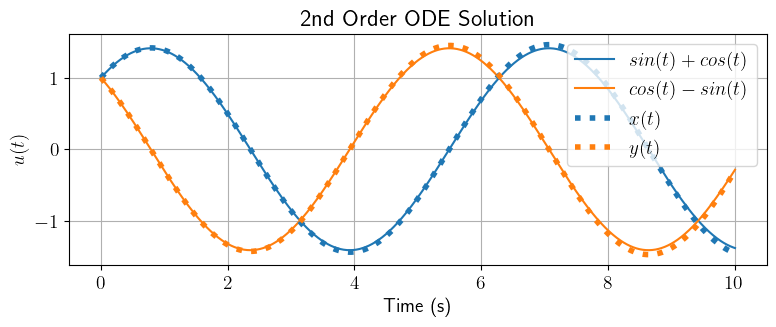

In [2]:
# Firstly, require an ODE to solve
# This is a 2nd order ODE converted to the required system of 1st order ODE's 
def ode(t, u, args):
    p, q = args
    x, y = u
    dxdt = p*y
    dydt = -q*x
    return [dxdt, dydt]

# Define solution paramters
x0 = [1.0, 1.0]
t1, t2 = 0, 10.005
h = 0.01
args = [1, 1]

# Solve using Euler method
x, t = nm.solve_to(ode, x0, t1, t2, h, nm.eurler_method, args)

# Plot solution against exact
exact_x = np.sin(t) + np.cos(t)
exact_y = np.cos(t) - np.sin(t)
plt.plot(t, exact_x, label="$sin(t) + cos(t)$")
plt.plot(t, exact_y, label="$cos(t) - sin(t)$")
plt.plot(t, x[:, 0], label="$x(t)$", linestyle=":", linewidth=4, color="tab:blue")
plt.plot(t, x[:, 1], label="$y(t)$", linestyle=":", linewidth=4, color="tab:orange")
nm.graph_format("Time (s)", "$u(t)$", "2nd Order ODE Solution")
plt.show()

As is seen above, the solve_to function produces an array of solutions for each ODE, along with an array of time values that the solution is evaluated at. Although the values of time steps could be calculated manually using functions such as np.linspace or np.arrange, the advantage of returning this array as part of the method is demonstrated. When the step-size does not exactly divide the time frame, then the function automatically calculates an additional final step-size using the remainder. This means that the user, as long as t1 < t2, can solve solutions for any time accurately.

The function can solve any order ODE system, with/without time dependancies, for any time length, for any initial conditions, over a wide range of step-sizes. Limitations do arise with these methods for very small step sizes for large time frames. The solutions will take longer to compute, as well as losing accuracy due to floating point rounding errors. The default maximum step size is set to 0.5, which may be overwritten if desired, however solution accuarcy will deteriate with too large step sizes. The midpoint method and runge-kutta 4th order method have also beein implemented. These can be called similarly by changing the `method` argument to the desired method. This was deemed to be a more code efficient way of including these methods, without having to call seperate functions. 

Design of this function took into account two important aspects; structure and interface. solve_to is designed to be used both standalone and as part of other numerical methods, therefore the code is required to be modular and efficient yet intuative. Code strcuture has been wirtten as to demostrate only the key mathematical processes involved, with any supplementary processes moved to other functions where possible. Function arguments have been named as to give the user an immediate idea of their intended use. Detailed documentation complements this to ensure a high level of usability and reducing the chance of errors.        

The main user consideration when applying this method is how to define the ODE. Users should define functions with three arguments, the first being the time variable, the second being the function variables and the third being any additional parameters. Function variables should be a single argument that is unpacked within the structure of the function, an example being `u` above. The additional parameters are optional, however, users will have to specify that there are no additional arguments in the ODE, as such `def ode(t, x, args=None):`. It is also possible for users to use lambda functions to define their ODE's, for example `ode = lambda t, x, args=None: [x[1], -x[0]]` which is equivalent to the ODE system defined earlier. This method of defining ODE's is similar to that required in other packages, such as scipy.integrate, and therefore was chosen for consistancy. 

## Reflective Log - Entry 1
The key challenges implementing the solve_to function were the design choices for the user experience, which affects how the code is required to run. Initially, ODE functions were to be inputted with each variable defined in its arguments. An example of this would be:
```
>>> def ode(t, x, y):
...    dxdt = y
...    dydt = -x
...    return [dxdt, dydt]
```

This was initially chosen due to its ease of implementation and readability. However, this produced many issues with variable unpacking, particularly with the simplest 1D cases. As a result, an alternative approach was considered, being for the user to unpack the variables themselves in the function, as is seen in the examples. It would be desirable to not have to include the definition of no additonal parameters, however an efficient work around has not yet been implemented.

A key learning point during the development of these methods was the accuracy vs computational complexity tradeoff. Implementing more complex methods is desirable to increase accuracy, however their usability becomes limited by how long they take to run, particularly at sufficiently small step sizes. It became apparent therefore that including mulitple different techniques is best, allowing the user to choose the most appropriate for them.

## Shooting

Shooting can be used to find stable limit cycle oscillations within ODE's. A common example of this can be found in the predator-prey model equations. These are defined as follows:

$\frac{dx}{dt} = x(1 - x) - \frac{axy}{d + x}$

$\frac{dy}{dt} = by(1 - \frac{y}{x})$

for $a = 1, d = 0.1, b \in [0.1, 0.5]$

This can be implemented directly into Python and passed to the solve_to function. It is often useful to do this step first, as an appropiate guess is required for numerical shooting. An appropriate phase condition is also required. The above equations were implemneted and an initial starting guess of $x_0 = 0.39, y_0 = 0.30, b = 0.25, t_{period} = 6.3$ was detremined. It is possible to skip this initial step, however in the interest of converging to a solution it is better to use an appropriate initial condition rather than an arbitrary guess. 
The following example uses the shooting function to find the exact solution to this limit cycle, using this starting guess. The phase condition used for this system is calculated using the derivative solution $\frac{dx}{dt}(0) = 0$, hence gives an additonal equation to minimise $p = x(1 - x) - \frac{axy}{d + x}$ to isolate a unique solution. Other phase conditions may be used under caution, as they may not provide feasible solutions. 

Root finder found the solution x = [0.39551779 0.29953169], period t = 18.38440240297539 after 13 function calls


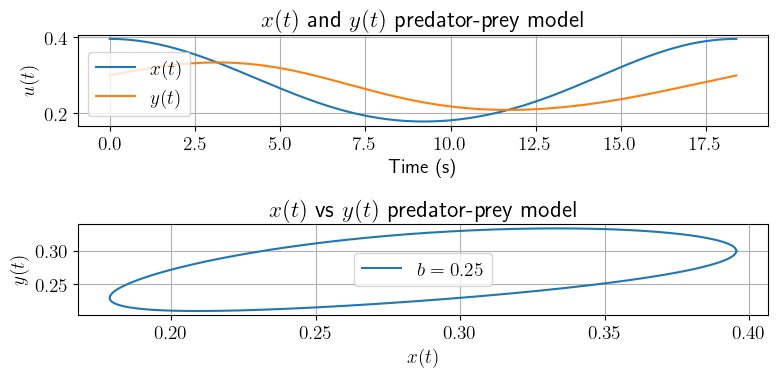

In [3]:
def predator_prey(t, u, args):
    a, d, b = args
    x, y = u
    dxdt = x*(1 - x) - (a*x*y)/(d + x)
    dydt = b*y*(1 - y/x)
    return dxdt, dydt

def phase(p, args):
    a, d, b = args
    x, y = p
    p = x*(1 - x) - (a*x*y)/(d + x)
    return p

x0 = [0.39, 0.30]
t1, t2 = 0, 19
h = 0.01
args = [1, 0.1, 0.25]
    
period = t2 - t1
x, t, x0, period = nm.shooting(predator_prey, x0, period, phase, args)

fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 4))
ax1.plot(t, x[:, 0], label="$x(t)$")
ax1.plot(t, x[:, 1], label="$y(t)$")
ax2.plot(x[:, 0], x[:, 1], label="$b = 0.25$")
nm.graph_format("Time (s)", "$u(t)$", "$x(t)$ and $y(t)$ predator-prey model", ax1)
nm.graph_format("$x(t)$", "$y(t)$", "$x(t)$ vs $y(t)$ predator-prey model", ax2)
plt.tight_layout()
plt.show()

The method takes advanatge of the `scipy.optimise.fsolve` routine to minimise the system solutions combined with the phase condition. This is a very robust method which has been heavily optimised for both speed and accurcacy. It was thereofre deemed the most appropriate method to be achieve this, which in turn drastically simplifying the code structure.    

As seen in this example, the method successfully finds the correct solution, providing the user with an (optional) output outlining the found initial conditions and period values. The function outputs not only the final time and variable solution arrays, but also the information encoded in the print statement, meaning users do not have to copy for the ouput command line. It is possible to find solutions for any arbiatrary ODE, of any dimension, as long as an appropriate starting (x0 and period) and phase condition are provided. Users will be provided with a convergence error message if the method fails, or another appropriate error message if any parameters are incorrect.      

The shooting method was designed to be used as similarly as possible to the solve_to function. This means that users are not required to modify any previous functions or paramters, only define any additonal information required. Not only is this beneficial to the user, it also allows for simpler and less repeated code, as the shooting method uses solve_to itself. It is also possible for users to modify the arguments of the solve_to function inside the shooting method. For example, users can specify an alternative `method` or `h` parameter. Shooting defaults to the `nm.euler_method` method, with a step-size of $h = 0.01$, as this is the most computationally inexpensive of the 3 implemented technqiues, while maintaining a high level of accuracy. Users will not however be able to increase the step-size beyond the deafult `delta_max = 0.5`, as this would likely result in incorrect solutions due to the limitations of the solvers.

## Refelctive Log - Entry 2

During this part of the project, the most important element was keeping consistancy with previous design choices. By building the function based on the previous method, it allowed for written and tested code to be re-used, reducing possible errors. The most challenging aspect was combining this with use of other other library functions.`scipy.optimise.fsolve` was the key component used in this function, hence it is vital that the arguments passed are directly, or indirectly through simple modification, compatible with this method. 

The most difficult aspect of this section was learning the mathematicel techniques involved in numerical shooting, mainly setting up the ODE system correctly to be minimised. Converting seeminly straight forward analytical representations to numerical solutions presented an unexpected challenge. Additionally, errors from previous functions that were unoticed caused issues in this stage of development, prompting longer and more difficult debugging stages. This highlighted the importance of thoroughly testing a wide range of scenarios, including those that at first appear to be successful.      

## Natural_parameter + Pseudo_arclength

Natural parameter and pseudo-arclength investigation has been implemented as the two numerical continuation methods in the numerical_methods.py library. The function aims to find the solutions of ODE limit cycles as a parameter varies, between an inital and final value. This is most useful in the investigation of bifuraction points and limit cycle stability. An example of this can be demonstarted using the modified hopf bifurcation normal form equations, defined below:

$\frac{du_1}{dt} = \beta u_1 - u_2 + u_1(u_1^2 + u_2^2) - u_1(u_1^2 + u_2^2)^2$

$\frac{du_2}{dt} = u_1 + \beta u_2 + u_2(u_1^2 + u_2^2) - u_2(u_1^2 + u_2^2)^2$

where $\beta \in [-1, 2]$.

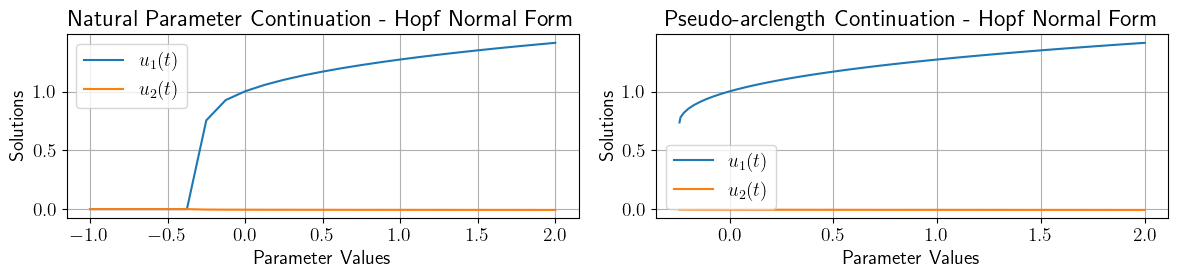

In [4]:
# Should take around 6 seconds to complete
# Define hopf normal form equations
def hopf_normal_form(t, u, args):
    b = args
    u1, u2 = u
    du1dt = b*u1 - u2 + u1*(u1**2 + u2**2) - u1*(u1**2 + u2**2)**2
    du2dt = u1 + b*u2 + u2*(u1**2 + u2**2) - u2*(u1**2 + u2**2)**2
    return [du1dt, du2dt]

# Define phase condition as u1'(0) = 0
hopf_phase = lambda p, b: b*p[0] - p[1] + p[0]*(p[0]**2 + p[1]**2) - p[0]*(p[0]**2 + p[1]**2)**2

# Initial conditions - These may be found using numerical shooting 
x0 = [1.0, 0.0] 
period = 6.3
args = 2
p_range, p_vary = [2, -1], None
num_steps = 25

# Perform natural parameter continuation
p_nat, x_nat = nm.natural_parameter(hopf_normal_form, x0, period, hopf_phase, p_range, p_vary, num_steps, args)

states = [[1.0, 0.0], [1.0, 0.0]] 
periods = [6.3, 6.3]
parameters = [2.0, 1.96]
p_final = -1

# Perform Psedo-arclength continuation
p_pseudo, v_pseudo = nm.pseudo_arclength(hopf_normal_form, states, periods, hopf_phase, parameters, p_vary, p_final, args)

# Plot results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 3))
ax1.plot(p_nat, x_nat[:, 0], label="$u_1(t)$")
ax1.plot(p_nat, x_nat[:, 1], label="$u_2(t)$")
ax2.plot(p_pseudo, v_pseudo[:, 0], label="$u_1(t)$")
ax2.plot(p_pseudo, v_pseudo[:, 1], label="$u_2(t)$")
nm.graph_format("Parameter Values", "Solutions", "Natural Parameter Continuation - Hopf Normal Form", ax1)
nm.graph_format("Parameter Values", "Solutions", "Pseudo-arclength Continuation - Hopf Normal Form", ax2)
plt.tight_layout()
plt.show()


This example demonstarates how the previous shooting function has been expanded upon to generate the continuation methods. Natural parameter performs numerical shooting a specified number of times, `num_step`, evenly covering the defined parameter range `p_range`. Pseudo-arclength on the other hand predicts a new solution using the secant of two previous solutions, found by shooting the values specified in `states`, `periods` and `parameters`. The orignal root-finding problem is then modified with the addition of the pseudo-arclength equation to find a new solution, repeating until `p_final` is reached.  

Once again, ODE definitions do not need to be changed, hence can be perfomerd on any system compatible with the previous methods. The numerical integration method is defaulted to `nm.euler_method`, however this can be altered by the user. The parameter to be varied should be included like any other parameter. `p_vary` is used to specify the index location of this parameter (not required with only one paramter). Parameter and initial conditions should be chosen carefully to enusre convergence. If the methods fail to converge, they will output all solutions up to that parameter value. The outputs include the array of parameter values and the array of associated solutions, allowing for plots to be made easily. 

LIMITATIONS:    

## Reflective Log - Entry 3



# Numerical_Differentiation.py

Numerical_differntiation.py contains 3 main functions associated with the solving of PDE systems; finite_difference, explicit_methods and implicit_methods. These are breifly described below:

1. finite_difference - uses finite difference methods to find solutions of BVP's
2. explicit methods - solves time and space dependant PDE's using explicit methods with given IC, BV's and time frame
3. implicit methods - solves time and space dependant PDE's using implicit methods with given IC, BV's and time frame

These methods require 2 additional features contained in this library; the Boundary_Condition class and construct_a_b_matricies function. Their uses are outlined as follows:

1. Boundary_Condition - Used to create boundary value objects to be passed into the main functions
2. construct_a_b_matricies - Constructs the appropriate PDE equivalent matrices used by the methods above

## Finite_difference

Finite difference methods can be used to approximate solutions to general differential equations. This function aims to achieve this for a wide range of possible ODE's, including non-linear source terms and different boundary condition types. 

An example ODE to demonstrate this is the Bratu problem, being a 2nd order ODE with a non-linear source term. The equation is defined as such:

$D\frac{d^2u}{dx^2} + e^{\mu u} = 0$

where $D = 1, \mu = 0.1$. To implement this, the user is required to formulate the right-hand side equation of the PDE (where the left hand side contains only the differentital), both boundary conditions, as well as a number of points, $n$, to evaluate the solution at.  

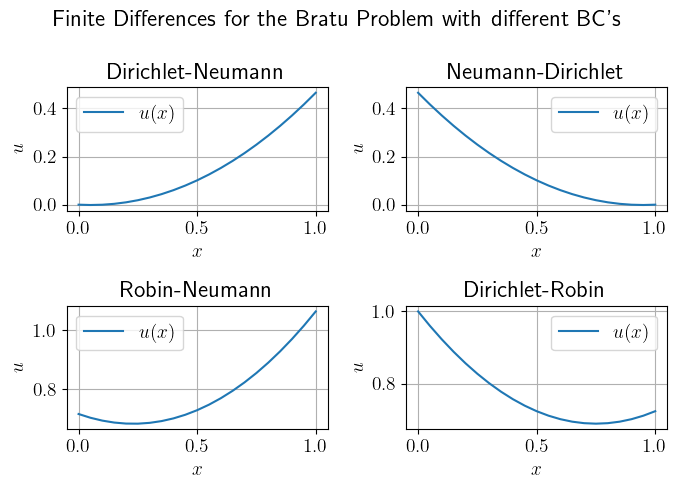

In [5]:
# Define ODE right-hand side
def ode_rhs(x, u, args):
    D, mu = args
    return -np.exp(mu*u)/D

# Define system parameters
a, b = 0, 1
n = 20
args = (1, 0.1)

bc_left, bc_right = nd.Boundary_Condition("Dirichlet", 0.0), nd.Boundary_Condition("Neumann", 1.0)
x1, u1 = nd.finite_difference(ode_rhs, a, b, bc_left, bc_right, n, args)
x2, u2 = nd.finite_difference(ode_rhs, a, b, bc_right, bc_left, n, args)

bc_left, bc_right = nd.Boundary_Condition("Robin", [1.0, 1.0]), nd.Boundary_Condition("Neumann", 1.0)
x3, u3 = nd.finite_difference(ode_rhs, a, b, bc_left, bc_right, n, args)
bc_left, bc_right = nd.Boundary_Condition("Dirichlet", 1.0), nd.Boundary_Condition("Robin", [1.0, 1.0])
x4, u4 = nd.finite_difference(ode_rhs, a, b, bc_left, bc_right, n, args)

fig, axs = plt.subplots(2, 2, figsize=(7, 5))
plt.suptitle("Finite Differences for the Bratu Problem with different BC's")
axs[0, 0].plot(x1, u1, label="$u(x)$"), axs[0, 1].plot(x2, u2, label="$u(x)$")
axs[1, 0].plot(x3, u3, label="$u(x)$"), axs[1, 1].plot(x4, u4, label="$u(x)$")
nm.graph_format("$x$", "$u$", "Dirichlet-Neumann", axs[0, 0])
nm.graph_format("$x$", "$u$", "Neumann-Dirichlet", axs[0, 1])
nm.graph_format("$x$", "$u$", "Robin-Neumann", axs[1, 0])
nm.graph_format("$x$", "$u$", "Dirichlet-Robin", axs[1, 1])
plt.tight_layout()
plt.show()

The example above shows how the method can be used with a combination of the 3 implemented boundary condition types; Dirichlet, Neumann and Robin. The choice to implement these as a class object stemed from the need to alter the equation matricies depending on the type of BC. As a result, users only need top provide the basic information, while the class methods can be used to discern this information. This simplifies the function itself while also minimising the chance of errors. 

The `construct_a_b_matricies` is the key feature to solving these problems. The function converts the defined system into an equivalent matrix form using the grid spacing and BC's, which is then solved using `np.linalg.solve` and Newtons method (for non-linear source terms). Using this reduces the computational complexity, and hence increases performance of the method, rather than using nested loops. Thomas' algorithm can be used to further improve performance, as this is a tri-diagonal matrix equation, however this was not implemented this time.       

One limitation of this formulation, is its inability to solve the system with two Neumann boundary conditions. This produces a singular matrix, which cannot be inverted, hence there is no solution to the matrix equation. Solutions of Neumann BC's on either side can however be verified. This is achieved by solving with an alternative condition, then flipping and solving again as was seen in the above example.          

## Reflective Log - Entry 4

This section of the project tested the combining of mathematical techniques with softawre engineering principles. It was difficult to keep the code short and clean when trying to generalise functions to handle a variety of scenarios. It was especially difficult conceptuialising the construction of varying size arrays to represent the required matricies. However, I believe this to be a positive lesson which will allow me to solve similar problems in the future.      

## Explict_methods

Expanding on the previous section, the explicit Euler and Runge-Kutta 4th order methods have been implemented to solve PDE's. These will take in functions similarly to `finite_difference`, with the addition of an initial condition and a final time. 

This can be demonstrated by implementing and solving the Fisher-KPP PDE, being an example of an inhomogeneuos quasilinear reaction-diffusion equation, as seen below:

$\frac{\delta u }{\delta t} = D \frac{\delta^2u}{\delta x^2} + ru(1-u)$

BC's: $u(0, t) = 1, \frac{\delta u}{\delta x}|_{x=10}$

IC: $u(x, 0) = 0$

with $D = 0.1, r = 2, 0 \leq x \leq 10, t_{final} = 20$

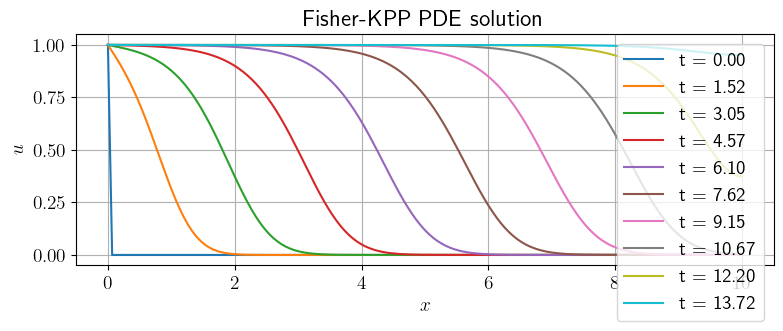

In [6]:
# Define Fisher-KPP PDE right han
def fisher_kpp(x, t, u, args):
    r = args
    return r*u*(1 - u)

#Define system paramters
a, b = 0, 10
d_coef = 0.1
bc_left = nd.Boundary_Condition("Dirichlet", 1.0)
bc_right = nd.Boundary_Condition("Neumann", 0.0)
ic = lambda x, args: 0
n = 150
t_final = 20
args = 2

# Solve using Runge-Kutta 4th order method
grid, time, u = nd.explicit_methods(fisher_kpp, a, b, d_coef, bc_left, bc_right, ic, n, t_final, "RK4", args)

# Plot solution as it develops over time
for i in range(10):
    plt.plot(grid, u[:, i*70], label=f"t = {time[i*70]:.2f}")
nm.graph_format("$x$", "$u$", "Fisher-KPP PDE solution")
plt.show()

The plot shows how the function tracks the PDE solution over time, demonstrating a travelling wave solution, indicating that the numerical differentiation has found an appropriate solution. The method can handle any of the previously defined boundary conditions, non-linear, time and space dpendant source terms and any initial condition $f(x)$. This function once again takes advantage of the previously defined method of constructing matrix equations, combined with the Euler or Runge-Kutta 4th order integration methods.

There are two main limitations with this method. Firstly, time-dependant boundary conditions have not been implemented, therefore restricts the use of this function slightly. This however could be updated in the future. Secondly, explicit methods are conditionally convergent, depending on the value of $c = \frac{\delta tD}{(\delta x)^2}$. Values of `d_coef`, `n` and `t_final` will therefore all have an affect on the success and accuracy of the produced solution. The methods are still included due to their computational inexpensivity.     

## Reflective Log - Entry 5

Implementing explicit methods introduced a variety of new challenges. Due to the use of matrix multiplication combined with convergence limitations, small mistakes in constructing and use of the function can produce overflow errors. These issues were difficult to diagnose at first as it was not immedietely obvious where the errors were coming from.

Having previously implemented methods such as Euler and Runge-Kutta, this helped speed up development as there was no need to re-learn these, only apply to these new situations. However, repeating this task, I would investigate how to re-use the code included in `numerical_methods.py` to be able to be used identically on ODE's and PDE's (due to PDE's being both time and space dependant) rather than only re-implementing them.      

## Implicit_methods

Some limitations of the explicit methods can be avoided by using implicit methods instead, mainly conditional convergence. Hence, the Euler and Crank-Nicolson implicit differentiation methods have been implemeneted to grant this option at the expense of computational complexity.

The following equation is used in the example below to demostrate the use of these methods:

$\frac{\delta u}{\delta t} = D \frac{\delta^2u}{\delta x^2} + (1 - u)e^{-x}$

BC: $\frac{\delta u}{\delta x}|_{x=0} = 0, \frac{\delta u}{\delta t}|_{x=L} = 0$

IC: $u(x, 0) = 0$

until $t = 10$, with $D = 0.05, L = 10, N = 500$ and $\delta t = 0.1$

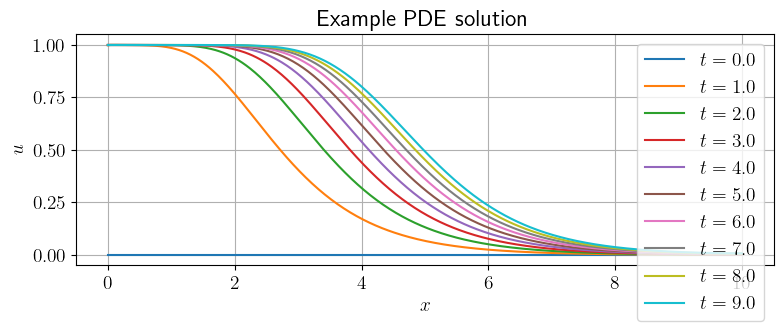

In [47]:
# Define PDE
def pde(x, t, u, args):
    return (1 - u)*np.exp(-x)

# Define system parameters
a, b = 0, 10
d_coef = 0.05
bc_left = nd.Boundary_Condition("Neumann", 0.0)
bc_right = nd.Boundary_Condition("Neumann", 0.0)
ic = lambda x, args: 0
n = 500
dt, t_final = 0.1, 10
args = None

# Solve using Crank-Nicolson implicit method
grid, time, u = nd.implicit_methods(pde, a, b, d_coef, bc_left, bc_right, ic, n, dt, t_final, "Crank-Nicolson", args)

# Plot solution as it develops over time
for i in range(10):
    plt.plot(grid, u[:, i*10], label=f"$t = {time[i*10]}$")
nm.graph_format("$x$", "$u$", "Example PDE solution")
plt.show()

The PDE is solved and plotted similarly to the `explicit_methods` function, however the user now specifies a time step size. This grants freedom in the level of desired accuracy in both space and time, as well as guarnteed convergence to a solution. 

The implemented implicit methods are not without their limitations. Specified PDE right-hand sides should be linear (or independant) in the dependant variable, hence non-linear equations are not suitable to be solved with this method. Although these methods may be adapted to solve non-linear source terms, after testing and profiling, the choice was taken not to include this. Each time step would require the use of a non-linear equation solver, such as Newtons method, making the process very computationally expensive. As a result, implicit-explicit methods were developed instead to grant users the ability to solve these systems.      

## Reflective Log - Enrty 6

## IMEX + Sparse Linear Algebra



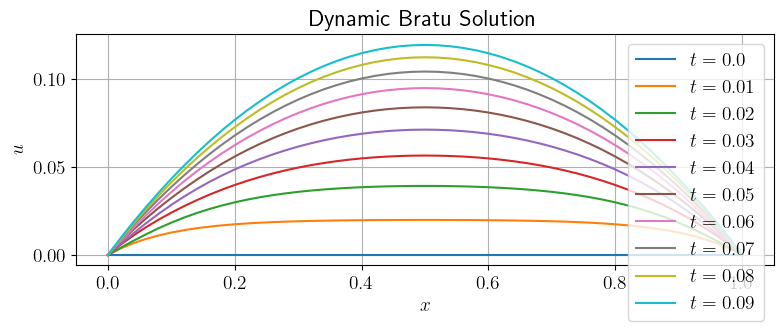

In [4]:
def bratu(x, t, u, args):
    mu = args
    return np.exp(mu*u)

a, b = 0, 1
d_coef = 1.0
bc_left = nd.Boundary_Condition("Dirichlet", 0.0)
bc_right = nd.Boundary_Condition("Dirichlet", 0.0)
ic = lambda x, args: 0
n = 50
dt, t_final = 0.01, 2
args = 2

grid, time, u = nd.imex(bratu, a, b, d_coef, bc_left, bc_right, ic, n, dt, t_final, args, sparse=True)

for i in range(10):
    plt.plot(grid, u[:, i], label=f"$t = {time[i]}$")
nm.graph_format("$x$", "$u$", "Dynamic Bratu Solution")
plt.show()

# Conclusion